In [37]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
import time
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [38]:
path_root = "../input/malimg/malimg_dataset/train"

start_time = time.time()


In [39]:
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000)

Found 7459 images belonging to 25 classes.


In [40]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [41]:
imgs, labels = next(batches)

In [42]:
imgs.shape

(7459, 64, 64, 3)

In [43]:
labels.shape

(7459, 25)

In [44]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

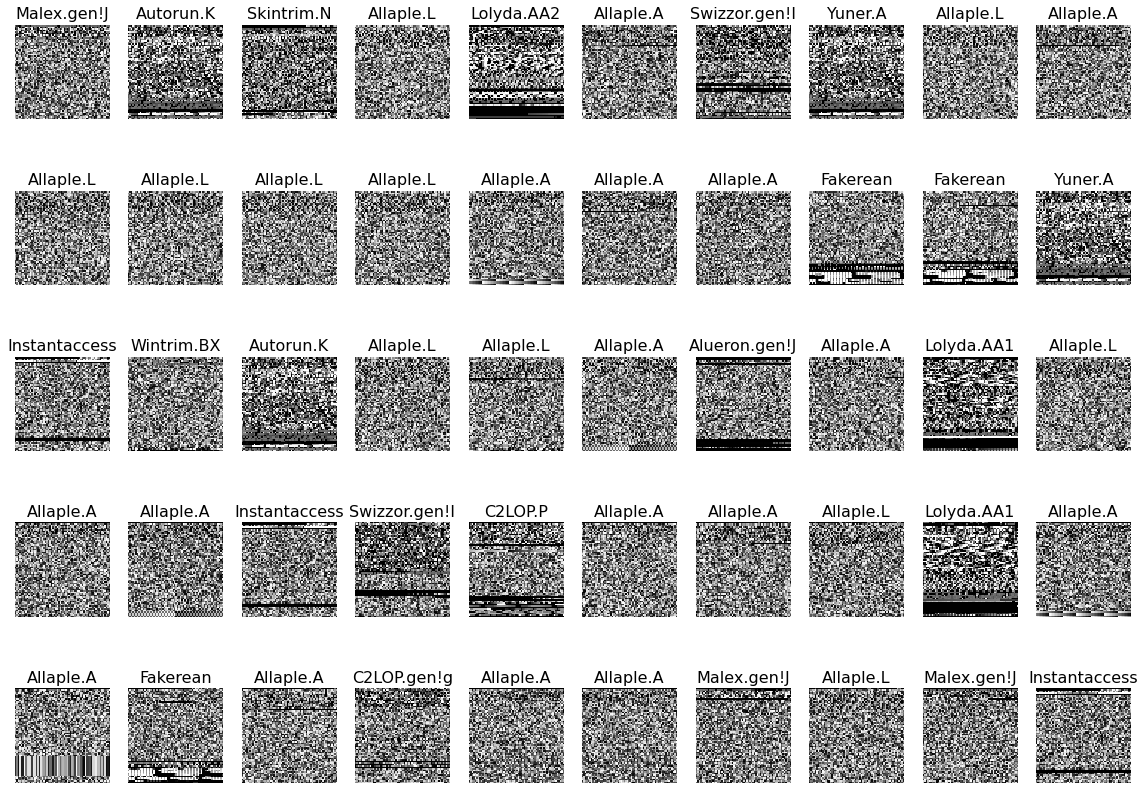

In [45]:
plots(imgs, titles = labels)

In [46]:
classes = batches.class_indices.keys()

In [47]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

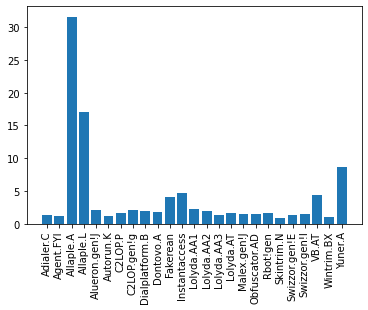

In [48]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [50]:
X_train.shape

(5221, 64, 64, 3)

In [51]:
X_test.shape

(2238, 64, 64, 3)

In [52]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import batch_normalization

In [53]:
num_classes = 25

In [54]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [55]:
Malware_model = malware_model()

In [56]:
Malware_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 30)        840       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 15)        4065      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 15)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 15)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2940)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [57]:
y_train.shape

(5221, 25)

In [58]:
y_train_new = np.argmax(y_train, axis=1)

In [59]:
y_train_new

array([22,  3,  0, ..., 16,  3, 13])

In [60]:
#from sklearn.utils import class_weight
#class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(y_train_new),y=y_train_new)

In [61]:
Malware_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=22)

Epoch 1/22
164/164 [==============================] - 8s 43ms/step - loss: 1.9684 - accuracy: 0.4177 - val_loss: 1.1834 - val_accuracy: 0.6189
Epoch 2/22
164/164 [==============================] - 8s 48ms/step - loss: 1.0625 - accuracy: 0.6405 - val_loss: 0.6827 - val_accuracy: 0.8172
Epoch 3/22
164/164 [==============================] - 7s 41ms/step - loss: 0.7340 - accuracy: 0.7619 - val_loss: 0.4591 - val_accuracy: 0.8847
Epoch 4/22
164/164 [==============================] - 7s 41ms/step - loss: 0.5401 - accuracy: 0.8372 - val_loss: 0.3586 - val_accuracy: 0.9030
Epoch 5/22
164/164 [==============================] - 7s 42ms/step - loss: 0.4405 - accuracy: 0.8698 - val_loss: 0.2666 - val_accuracy: 0.9169
Epoch 6/22
164/164 [==============================] - 7s 43ms/step - loss: 0.3570 - accuracy: 0.8878 - val_loss: 0.2510 - val_accuracy: 0.9173
Epoch 7/22
164/164 [==============================] - 9s 54ms/step - loss: 0.2972 - accuracy: 0.9069 - val_loss: 0.2325 - val_accuracy: 0.9348

In [62]:
scores = Malware_model.evaluate(X_test, y_test)

70/70 [==============================] - 1s 11ms/step - loss: 0.1645 - accuracy: 0.9567


In [63]:
end_time = time.time()

time_run = end_time-start_time
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.9566577076911926


In [64]:
#Lets anlysis our result:
import numpy as np
import pandas as pd

In [65]:
y_pred = Malware_model.predict(X_test[[0]])

In [66]:
y_pred

array([[4.1410497e-10, 6.3286884e-12, 2.2495467e-11, 1.6466343e-09,
        2.2765926e-08, 3.1668812e-01, 1.6676467e-09, 4.2015249e-09,
        5.5213807e-12, 8.9857054e-12, 3.5292280e-10, 1.3225131e-08,
        4.1972580e-08, 2.5710170e-07, 2.3070248e-12, 3.7416844e-13,
        2.5802697e-11, 5.4853587e-11, 7.9637545e-07, 5.0549347e-09,
        7.2592838e-06, 4.6422187e-07, 7.3181296e-12, 9.6426556e-10,
        6.8330306e-01]], dtype=float32)

In [67]:
y_test2 = np.argmax(y_test)

In [68]:
print(y_test2)

24


In [69]:
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model

In [70]:
save_model(Malware_model,'malware.h5')

In [71]:
model2=load_model('./malware.h5')

In [72]:
model2.evaluate(X_test,y_test)

70/70 [==============================] - 1s 11ms/step - loss: 0.1645 - accuracy: 0.9567


[0.1644754260778427, 0.9566577076911926]

In [73]:
time_run = end_time-start_time
time_run

191.94735670089722